### Libraries

In [1]:
import torch
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Data exploration

(120, 120)
(120, 120, 4)


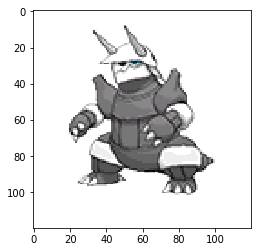

In [2]:
im = Image.open("aggron.png").convert("RGBA")
print(im.size)
plt.imshow(im)
arr = np.array(im)
print(arr.shape)

In [3]:
# there are some colors around x = 60, y = 45-75
print(arr[60,45:75,:])

[[ 85  85  85 255]
 [ 68  51  68 255]
 [ 34  34  34 255]
 [ 51  51  51 255]
 [ 68  68  68 255]
 [ 51  51  51 255]
 [ 85  68  85 255]
 [ 85  85  85 255]
 [ 68  68  68 255]
 [ 68  68  68 255]
 [ 68  68  68 255]
 [ 68  68  68 255]
 [ 51  51  51 255]
 [ 34  34  34 255]
 [ 68  68  68 255]
 [ 68  68  68 255]
 [ 85  85  85 255]
 [ 85  85  85 255]
 [ 68  68  68 255]
 [ 68  68  68 255]
 [136 136 136 255]
 [153 153 153 255]
 [136 136 136 255]
 [136 136 136 255]
 [136 136 136 255]
 [136 136 136 255]
 [136 136 136 255]
 [153 153 153 255]
 [136 136 136 255]
 [ 51  51  51 255]]


In [4]:
# instead of dividing it by 255, divide it by the max pixel
scaledArr = arr / np.max(arr)
print(scaledArr[60,45:75,:])

[[0.33333333 0.33333333 0.33333333 1.        ]
 [0.26666667 0.2        0.26666667 1.        ]
 [0.13333333 0.13333333 0.13333333 1.        ]
 [0.2        0.2        0.2        1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.2        0.2        0.2        1.        ]
 [0.33333333 0.26666667 0.33333333 1.        ]
 [0.33333333 0.33333333 0.33333333 1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.2        0.2        0.2        1.        ]
 [0.13333333 0.13333333 0.13333333 1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.33333333 0.33333333 0.33333333 1.        ]
 [0.33333333 0.33333333 0.33333333 1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.26666667 0.26666667 0.26666667 1.        ]
 [0.53333333 0.53333333 0.53333333 1.        ]
 [0.6        

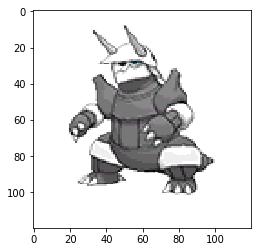

In [5]:
plt.imshow(scaledArr)

In [6]:
def loadImgAndNormalize(imgPath):
    extensions = imgPath.rsplit(".")
    pokemonName = extensions[0]
    
    im = Image.open(imgPath).convert("RGBA")
    arr = np.array(im)
    scaledArr = arr / np.max(arr)
    
    tensor = torch.from_numpy(scaledArr).permute(2,0,1)
    
    return tensor, pokemonName

In [7]:
root_dir = os.getcwd()
data_dir = os.path.join(root_dir, "images//images")

os.chdir(data_dir)

numberOfData = len(os.listdir())

data = torch.zeros(size=[numberOfData, 4,120,120])
labels = []

for i, folder in enumerate(os.listdir()):
    tensor, pokemonName = loadImgAndNormalize(folder)
    
    data[i] = tensor
    labels.append(pokemonName)
    
os.chdir(root_dir)

In [8]:
print(f"shape of data array is: {data.shape}")
print(f"length of label list is: {len(labels)}")

shape of data array is: torch.Size([809, 4, 120, 120])
length of label list is: 809


torch.Size([4, 120, 120])


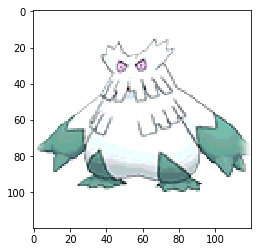

In [9]:
print(data[0].shape)
plt.imshow(data[0].permute(1,2,0))

In [10]:
numberOfTestData = 20
trainData = torch.zeros(size=[numberOfData - numberOfTestData, 4, 120, 120])
testData = torch.zeros(size=[numberOfTestData, 4, 120, 120])

trainTensor = data[0 : len(labels) - numberOfTestData]
testTensor = data[-numberOfTestData:]

labelTrain = labels[0 : len(labels) - numberOfTestData]
labelTest = labels[-numberOfTestData:]

In [11]:
torch.save(trainTensor, 'trainTensor.pt')
torch.save(testTensor, 'testTensor.pt')

with open("trainLabels.txt", "w") as f:
    for i in range(len(labelTrain)):
        f.write(labelTrain[i] + "\n")
        
with open("testLabels.txt", "w") as f:
    for i in range(len(labelTest)):
        f.write(labelTest[i] + "\n")